
# Load the dataset with all libraries


In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras import regularizers
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
from sklearn.metrics import roc_curve, auc


df = pd.read_excel('/content/loan.xlsx')

df.replace('accept', 1, inplace=True)
df.replace('reject', 0, inplace=True)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
x = df['Decision'].value_counts().head(10)
print(x)

0    237
1    192
Name: Decision, dtype: int64


In [5]:
print(df.columns)
df.isnull().sum()

Index(['Sex', 'Age', 'Time_at_address', 'Res_status', 'Telephone',
       'Occupation', 'Job_status', 'Time_employed', 'Time_bank', 'Liab_ref',
       'Acc_ref', 'Home_Expn', 'Balance', 'Decision'],
      dtype='object')


Sex                0
Age                0
Time_at_address    0
Res_status         0
Telephone          0
Occupation         0
Job_status         0
Time_employed      0
Time_bank          0
Liab_ref           0
Acc_ref            0
Home_Expn          0
Balance            0
Decision           0
dtype: int64

In [6]:
cat_cols = ['Sex', 'Res_status', 'Telephone', 'Occupation', 'Job_status','Liab_ref','Acc_ref']

encoder = OneHotEncoder()
encoded_cols = encoder.fit_transform(df[cat_cols])
encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=encoder.get_feature_names_out(cat_cols))
df = pd.concat([df.drop(cat_cols, axis=1), encoded_df], axis=1)
print(df.head())

         Age  Time_at_address  Time_employed  Time_bank  Home_Expn  Balance  \
0  50.750000            0.585              0          0        145        0   
1  19.670000           10.000              0          0        140        0   
2  52.830002           15.000              5         14          0     2200   
3  22.670000            2.540              2          0          0        0   
4  29.250000           13.000              0          0        228        0   

   Decision  Sex_F  Sex_M  Res_status_owner  ...  Job_status_military  \
0         0    0.0    1.0               1.0  ...                  0.0   
1         0    0.0    1.0               0.0  ...                  0.0   
2         1    1.0    0.0               1.0  ...                  0.0   
3         1    0.0    1.0               0.0  ...                  0.0   
4         0    0.0    1.0               1.0  ...                  0.0   

   Job_status_private_s  Job_status_retired  Job_status_self_empl  \
0                

In [7]:
print(df.dtypes)

Age                     float64
Time_at_address         float64
Time_employed             int64
Time_bank                 int64
Home_Expn                 int64
Balance                   int64
Decision                  int64
Sex_F                   float64
Sex_M                   float64
Res_status_owner        float64
Res_status_rent         float64
Telephone_given         float64
Telephone_not_given     float64
Occupation_creative_    float64
Occupation_driver       float64
Occupation_executive    float64
Occupation_guard_etc    float64
Occupation_labourer     float64
Occupation_manager      float64
Occupation_office_st    float64
Occupation_productio    float64
Occupation_professio    float64
Occupation_sales        float64
Occupation_semi_pro     float64
Occupation_unemploye    float64
Job_status_governmen    float64
Job_status_military     float64
Job_status_private_s    float64
Job_status_retired      float64
Job_status_self_empl    float64
Job_status_student      float64
Job_stat

2.Found out corelation matrix to determine relevant columns

In [8]:
corr_matrix = df.corr()['Decision']
sorted_corr = corr_matrix.sort_values(ascending=False)
print(sorted_corr)

Decision                1.000000
Time_bank               0.455942
Time_employed           0.339833
Balance                 0.191858
Age                     0.181241
Occupation_professio    0.165153
Time_at_address         0.163298
Job_status_governmen    0.158575
Telephone_given         0.139104
Res_status_owner        0.139104
Occupation_semi_pro     0.134504
Occupation_office_st    0.133674
Acc_ref_given           0.106354
Job_status_retired      0.083847
Liab_ref_t              0.068508
Occupation_executive    0.067796
Sex_F                   0.052564
Occupation_creative_    0.032268
Occupation_productio    0.028458
Job_status_self_empl   -0.009342
Job_status_student     -0.010385
Occupation_manager     -0.029066
Occupation_sales       -0.033932
Job_status_military    -0.043507
Job_status_private_s   -0.044389
Sex_M                  -0.052564
Liab_ref_f             -0.068508
Occupation_driver      -0.078199
Home_Expn              -0.087311
Acc_ref_oth_inst_      -0.106354
Occupation

#Plotted the Sorted Corelation Matrix

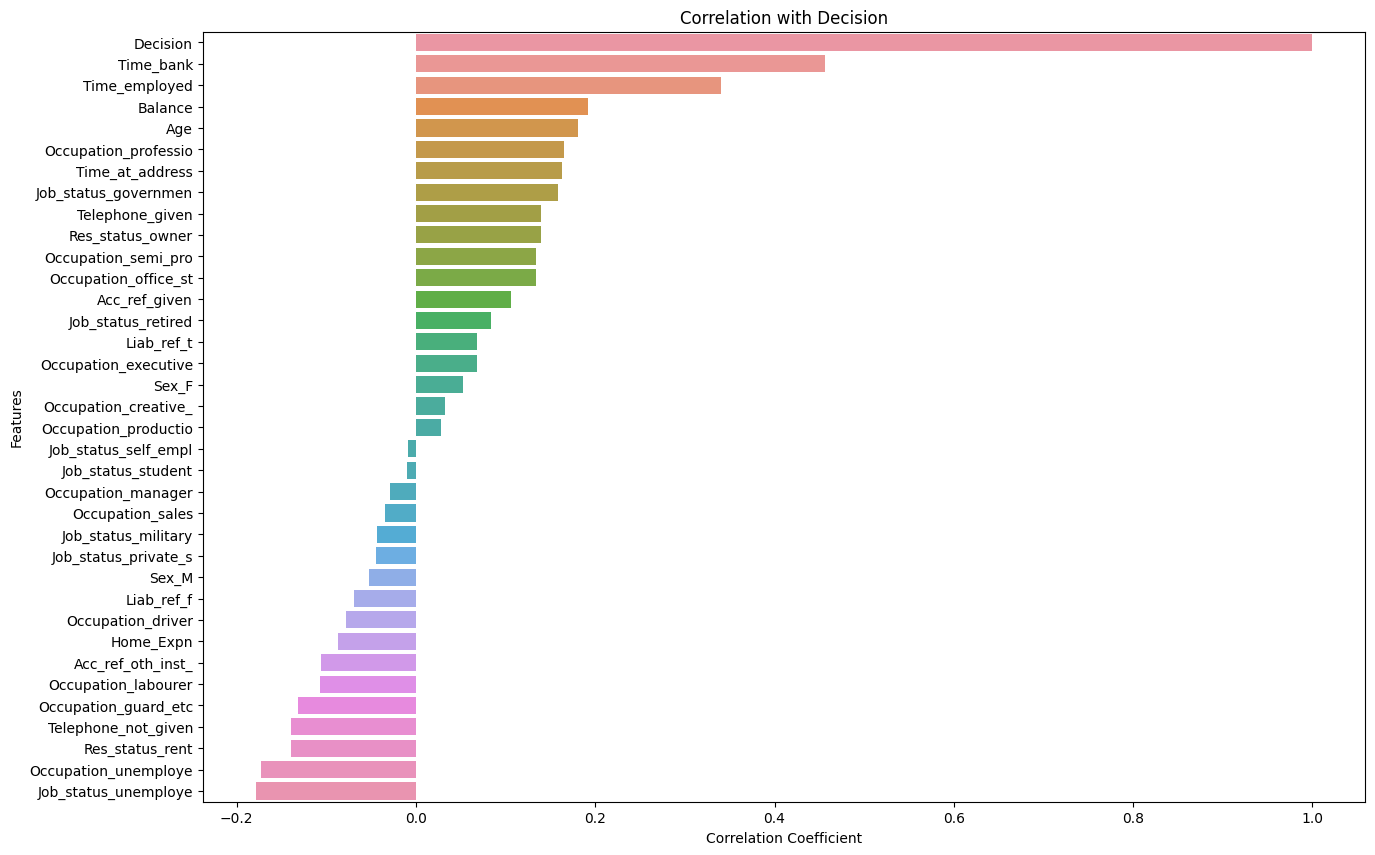

In [9]:
plt.figure(figsize=(15, 10))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index)
plt.title('Correlation with Decision')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

#Creating new DF with only relevant columns

In [10]:
positive_corr_cols = sorted_corr[sorted_corr > 0].index
df = df.loc[:, positive_corr_cols]
print(df.columns)

Index(['Decision', 'Time_bank', 'Time_employed', 'Balance', 'Age',
       'Occupation_professio', 'Time_at_address', 'Job_status_governmen',
       'Telephone_given', 'Res_status_owner', 'Occupation_semi_pro',
       'Occupation_office_st', 'Acc_ref_given', 'Job_status_retired',
       'Liab_ref_t', 'Occupation_executive', 'Sex_F', 'Occupation_creative_',
       'Occupation_productio'],
      dtype='object')


#Plotting the graphs for above columns

In [11]:
df.columns

Index(['Decision', 'Time_bank', 'Time_employed', 'Balance', 'Age',
       'Occupation_professio', 'Time_at_address', 'Job_status_governmen',
       'Telephone_given', 'Res_status_owner', 'Occupation_semi_pro',
       'Occupation_office_st', 'Acc_ref_given', 'Job_status_retired',
       'Liab_ref_t', 'Occupation_executive', 'Sex_F', 'Occupation_creative_',
       'Occupation_productio'],
      dtype='object')

#plotted the Relevant Columns

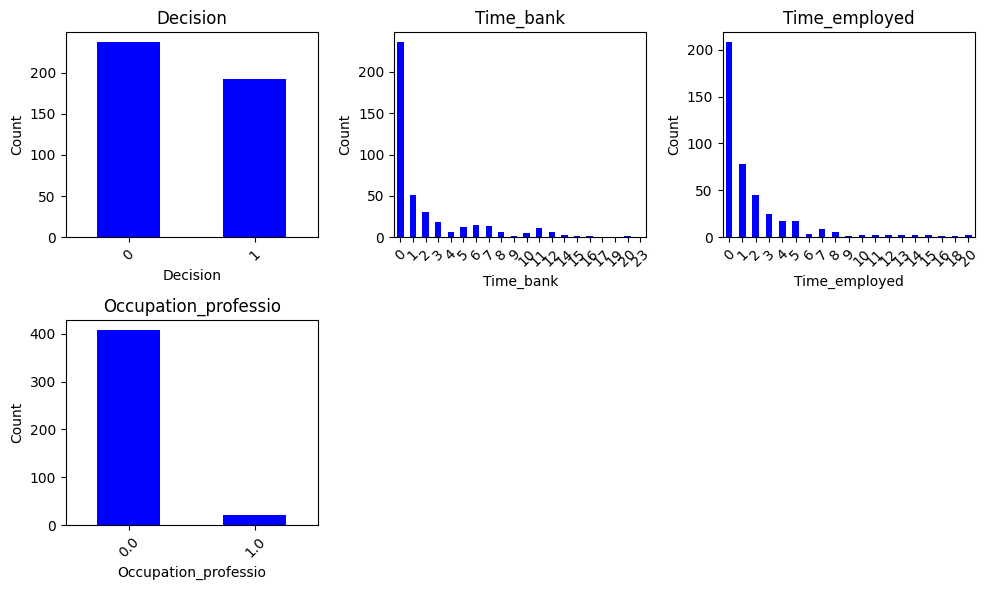

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
columns_to_plot = ['Decision', 'Time_bank', 'Time_employed', 'Balance', 'Age','Occupation_professio', 'Time_at_address', 'Job_status_governmen','Telephone_given', 'Res_status_owner', 'Occupation_semi_pro',                   
                   'Occupation_office_st', 'Acc_ref_given', 'Job_status_retired','Liab_ref_t', 'Occupation_executive', 'Sex_F', 'Occupation_creative_','Occupation_productio']
columns_set = ['Decision', 'Time_bank', 'Time_employed', 'Occupation_professio']
plt.figure(figsize=(10,6))
for i, column in enumerate(columns_set):
    plt.subplot(2,3,i+1)
    df.groupby(column)[column].count().plot(kind='bar', color='blue')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



#Split the data into X and y

In [17]:
X = df.drop('Decision', axis=1)
y = df['Decision']
print(X.columns)

Index(['Time_bank', 'Time_employed', 'Balance', 'Age', 'Occupation_professio',
       'Time_at_address', 'Job_status_governmen', 'Telephone_given',
       'Res_status_owner', 'Occupation_semi_pro', 'Occupation_office_st',
       'Acc_ref_given', 'Job_status_retired', 'Liab_ref_t',
       'Occupation_executive', 'Sex_F', 'Occupation_creative_',
       'Occupation_productio'],
      dtype='object')


In [18]:
print(y.head())

0    0
1    0
2    1
3    1
4    0
Name: Decision, dtype: int64


#Normalizing the data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (343, 18)
X_test shape: (86, 18)
y_train shape: (343,)
y_test shape: (86,)


#Applied NN model with 4 Layers

In [21]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [22]:
# class CustomCallback(tf.keras.callbacks.Callback):
#     def on_train_batch_begin(self, batch, logs=None):
#         print(model.get_weights())
#         keys = list(logs.keys())
#         print("...Training: start of batch {}; got log keys: {}".format(batch, keys))


In [23]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Fit the model on the training data

Epoch 1/500
22/22 [==============================] - 3s 24ms/step - loss: 0.7080 - accuracy: 0.5044 - val_loss: 0.6963 - val_accuracy: 0.4884
Epoch 2/500
22/22 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5306 - val_loss: 0.6928 - val_accuracy: 0.6047
Epoch 3/500
22/22 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5219 - val_loss: 0.6921 - val_accuracy: 0.5349
Epoch 4/500
22/22 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5802 - val_loss: 0.6885 - val_accuracy: 0.5581
Epoch 5/500
22/22 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5335 - val_loss: 0.6817 - val_accuracy: 0.5930
Epoch 6/500
22/22 [==============================] - 0s 4ms/step - loss: 0.6682 - accuracy: 0.6152 - val_loss: 0.6763 - val_accuracy: 0.5930
Epoch 7/500
22/22 [==============================] - 0s 4ms/step - loss: 0.6567 - accuracy: 0.6297 - val_loss: 0.6698 - val_accuracy: 0.5698
Epoch 8/500


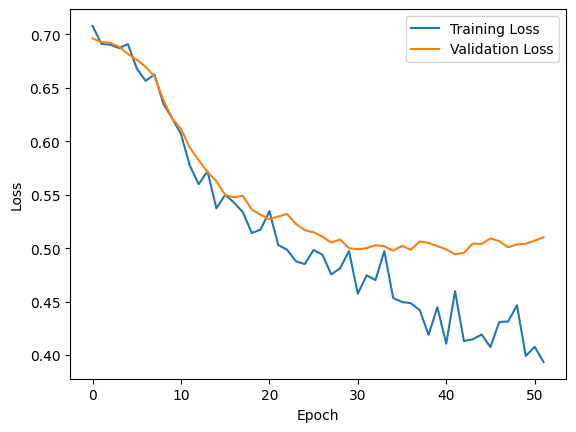

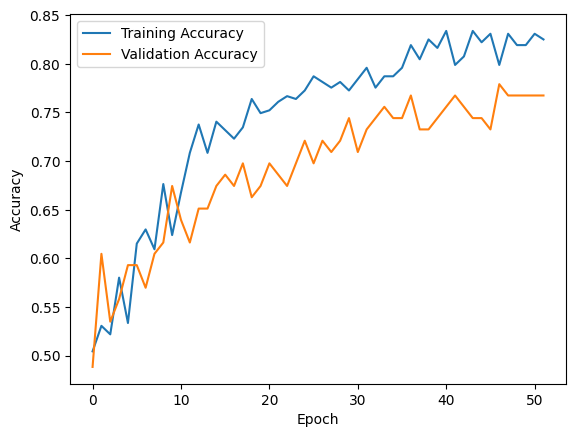

In [24]:
history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Evaluate the model on the test data

In [25]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {:.2f}%".format(accuracy*100))

Training Accuracy: 84.26%


In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test,verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 0.4942989647388458
Test Accuracy: 0.7674418687820435


#Applied NN with 2 layers

In [27]:
model_new= Sequential()
model_new.add(Dense(24,activation='relu',input_dim=X_train.shape[1]))
model_new.add(Dense(12,activation='relu'))
model_new.add(Dense(1,activation='sigmoid'))
model_new.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


Epoch 1/100
43/43 [==============================] - 1s 7ms/step - loss: 0.7016 - accuracy: 0.4723 - val_loss: 0.7046 - val_accuracy: 0.4186
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.6181 - val_loss: 0.6890 - val_accuracy: 0.5698
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.6880 - val_loss: 0.6783 - val_accuracy: 0.6047
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.7085 - val_loss: 0.6692 - val_accuracy: 0.5930
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6349 - accuracy: 0.7376 - val_loss: 0.6556 - val_accuracy: 0.6163
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.7522 - val_loss: 0.6347 - val_accuracy: 0.6628
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.5927 - accuracy: 0.7493 - val_loss: 0.6131 - val_accuracy: 0.6744
Epoch 8/100
4

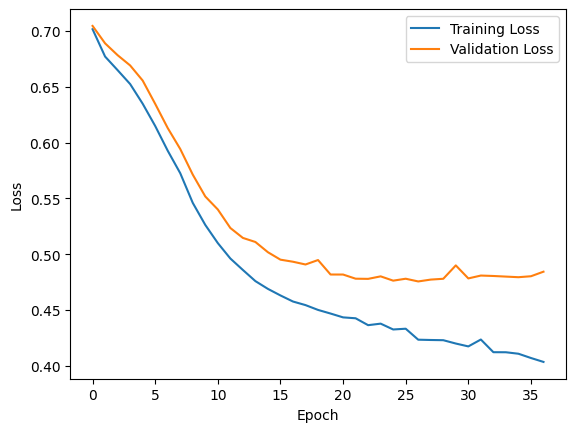

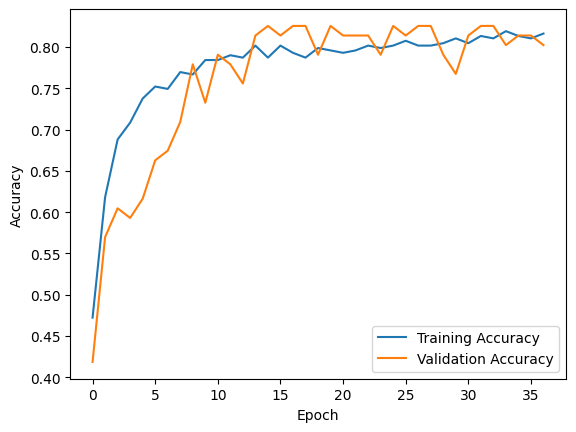

In [28]:
history2 = model_new.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stopping])
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#Evaluate the model on the test data


In [29]:
loss, accuracy = model_new.evaluate(X_test, y_test, verbose=1)
print("Accuracy: {:.2f}%".format(accuracy*100))

3/3 [==============================] - 0s 4ms/step - loss: 0.4756 - accuracy: 0.8256
Accuracy: 82.56%


#Weight Analysis

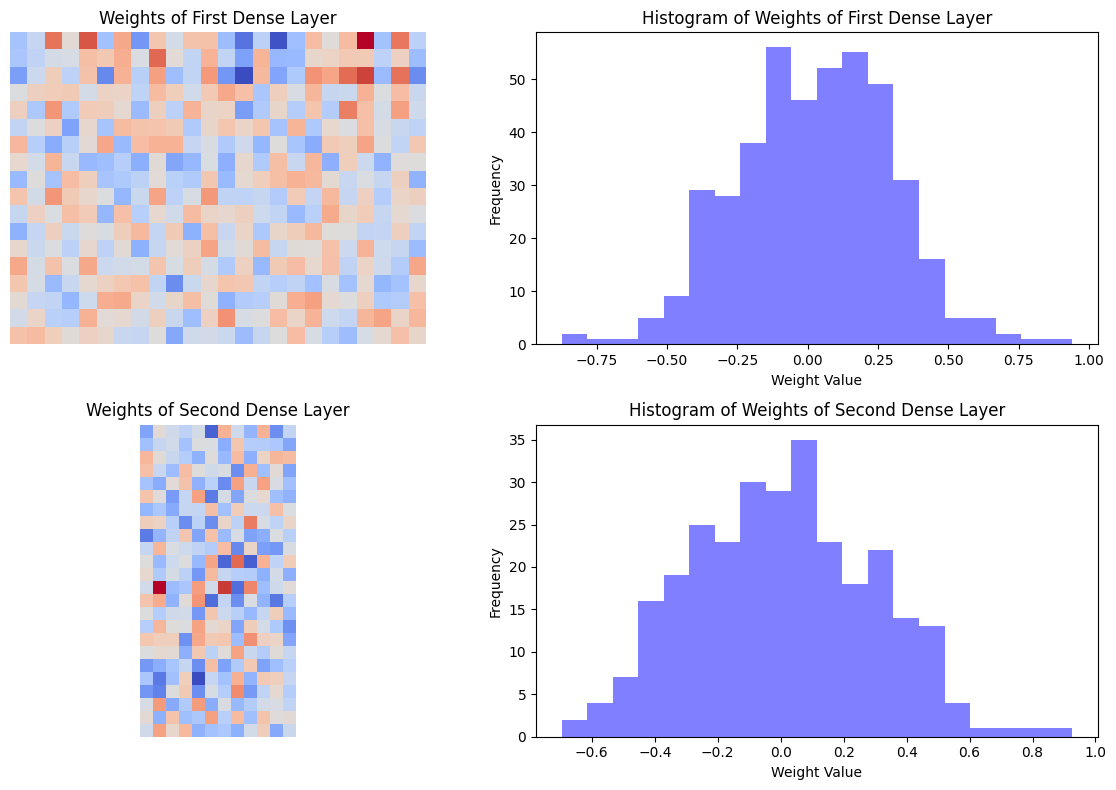

In [30]:
import matplotlib.pyplot as plt
weights1 = model_new.layers[0].get_weights()[0]
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].imshow(weights1, cmap='coolwarm')
axs[0, 0].set_title('Weights of First Dense Layer')
axs[0, 0].axis('off')
axs[0, 1].hist(weights1.flatten(), bins=20, color='blue', alpha=0.5)
axs[0, 1].set_xlabel('Weight Value')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Weights of First Dense Layer')
weights2 = model_new.layers[1].get_weights()[0]
axs[1, 0].imshow(weights2, cmap='coolwarm')
axs[1, 0].set_title('Weights of Second Dense Layer')
axs[1, 0].axis('off')
axs[1, 1].hist(weights2.flatten(), bins=20, color='blue', alpha=0.5)
axs[1, 1].set_xlabel('Weight Value')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of Weights of Second Dense Layer')
plt.tight_layout()
plt.show()


#ROC Curve

3/3 [==============================] - 0s 5ms/step


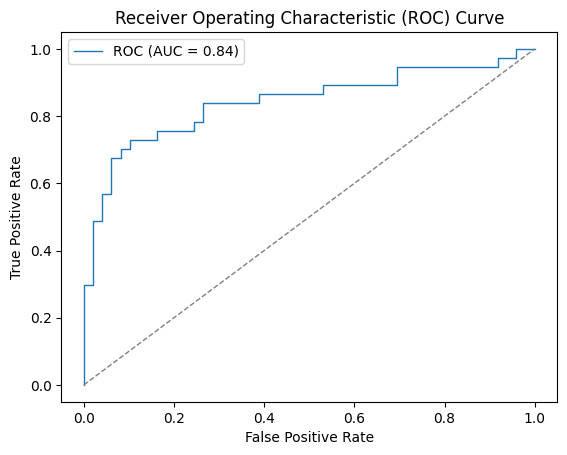

In [31]:
from sklearn.metrics import roc_curve, auc
y_score = model_new.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
